In [1]:
# Open source data analysis and manipulation tool.
import pandas as pd

# Python data visualization library.
import seaborn as sns

#It provides numerical routines for numerical integration, interpolation, optimization, linear algebra, and statistics.
import scipy.stats as ss
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##### https://docs.scipy.org/doc/scipy/reference/stats.html
##### https://seaborn.pydata.org/

### ¿Qué buscamos? ¿Cuál es nuestra hipótesis?

Los datos que buscamos, los atributos que medimos o recolectamos y las comparaciones que hagamos dependen en primera instancia de aquello que perseguimos

In [3]:
path = '/home/lean/Documentos/Lean/Estadistica/Manejo de Datos en Biología Computacional. Herramientas de Estadística/Herramientas-de-estadistica/Tablas/'
df = pd.read_csv(path + 'Tabla_estadistica.csv', sep=';', header=0)
del df['Numero']

In [9]:
df.head()

,Fecha,Sexo,Poblacion,AdenoV,RSV,INFA,INFB,PIV1,PIV2,PIV3,Edad(meses)
0,03/01/11,F,CABA,-,-,-,-,-,-,-,96.0
1,03/01/11,F,LA FERRERE,-,-,-,-,-,-,-,4.0
2,03/01/11,M,VILLA CELINA,-,-,-,-,-,-,-,8.0
3,03/01/11,M,VILLA CELINA,-,-,-,-,-,-,-,8.0
4,03/01/11,F,NaN,-,-,-,-,-,-,-,9.0


In [4]:
df.describe()

,Edad(meses)
count,6730.000000
mean,17.806300
std,92.370807
min,0.000000
25%,2.000000
50%,6.000000
75%,13.000000
max,6120.000000


### ¿Qué hacemos si faltan valores para algunos atributos?

*Ante la falta de valores tenemos tres opciones:*

   *- Eliminamos cada suceso que tenga al menos un valor faltante.*
    
   *- Reemplazamos los valores faltantes por el valor más frecuente
      si el atributo es categórico o por el promedio si es numérico.*
      
   *-Eliminar los atributos con datos faltantes.*
      
*¿Qué harían ustedes?*

In [10]:
df = df.dropna()
del df['Fecha']
df

,Sexo,Poblacion,AdenoV,RSV,INFA,INFB,PIV1,PIV2,PIV3,Edad(meses)
0,F,CABA,-,-,-,-,-,-,-,96.0
1,F,LA FERRERE,-,-,-,-,-,-,-,4.0
2,M,VILLA CELINA,-,-,-,-,-,-,-,8.0
3,M,VILLA CELINA,-,-,-,-,-,-,-,8.0
5,M,CABA,-,-,-,-,-,-,-,1.0
...,...,...,...,...,...,...,...,...,...,...
6722,M,CIUDAD EVITA,-,-,-,-,-,-,-,2.0
6723,F,CABA,-,-,-,-,-,-,-,60.0
6724,M,CABA,-,-,-,-,-,-,-,48.0
6725,M,TRES DE FEBRERO,-,-,-,-,-,-,-,4.0


### ¿Qué nos dicen los datos?¿Tienen sentido?

***Hay datos que se alejan del comportamiento estándar y para eso tenemos conocer las razones***

***-Errores al cargar los datos***

***-Valores erráticos (Outliers)***

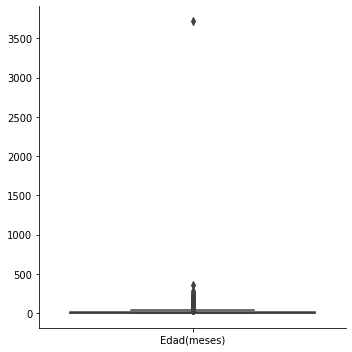

In [7]:
sns.catplot(x=None, y=None, kind="box", data=df)

***Criterio IQR para el tratamiento de outliers***

In [10]:
Q1 = df['Edad(meses)'].quantile(0.02)
Q3 = df['Edad(meses)'].quantile(0.98)
IQR = Q3 - Q1
idx = ~((df['Edad(meses)'] < (Q1 - 1.5 * IQR)) | (df['Edad(meses)'] > (Q3 + 1.5 * IQR)))

In [11]:
df1 = df[idx.values]

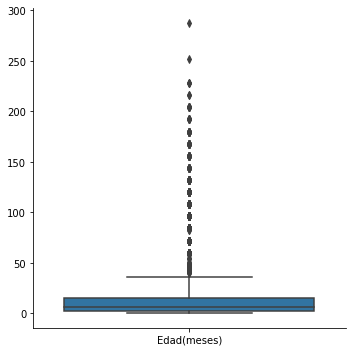

In [12]:
#Volvemos a graficar
sns.catplot(x=None, y=None, kind="box", data=df1)

**Criterio de z-score para el tratamiento de outliers**

In [14]:
# Test de outliers

'''Este test me devuelve las posiciones que tiene un z-score por encima del valor de referencia;
es decir, las posiciones de los datos outliers'''

#Calcula el estadístico del test
z = np.abs(ss.zscore(df['Edad(meses)']))

#Muestra las posiciones donde están los outliers
threshold = 3
print(np.where(z > threshold))

(array([  84,  243,  328, 1438, 2115, 3212, 3345, 3640, 3706]),)


In [15]:
# Elimino outliers

df_no_outliers = df[(z < threshold)]

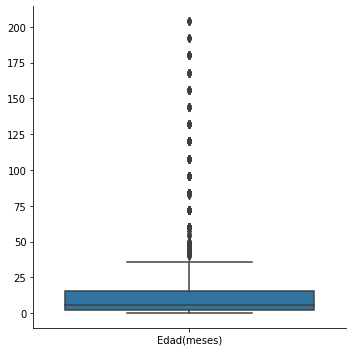

In [16]:
#Volvemos a graficar
sns.catplot(x=None, y=None, kind="box", data= df_no_outliers)

### ¿Qué se puede decir de las edades?

##### Cálculo de frecuencias

In [12]:
cumfreq = ss.cumfreq(df['Edad(meses)'], numbins=10, defaultreallimits=None, weights=None)
relfreq = ss.relfreq(df['Edad(meses)'], numbins=10, defaultreallimits=None, weights=None)

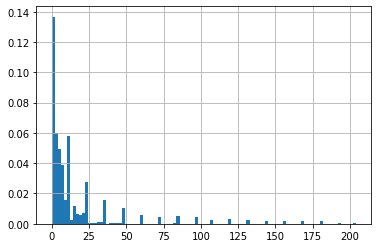

In [18]:
# Cumulative counts:
df_no_outliers['Edad(meses)'].hist(cumulative=False, density=1, bins=100)
plt.show()

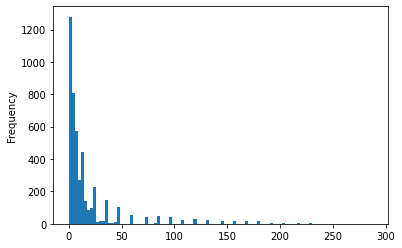

In [19]:
#Graficamos la distribuicón de los datos: histograma
%matplotlib inline
x = df1['Edad(meses)']
plt.hist(x, bins=100)
plt.ylabel('Frequency');

**¿Qué conclusiones podemos sacar?**

In [20]:
# Test de distribución

print(ss.normaltest(df1['Edad(meses)'], axis=0, nan_policy='propagate'))
print(ss.shapiro(df1['Edad(meses)']))

NormaltestResult(statistic=3395.494093628281, pvalue=0.0)
ShapiroResult(statistic=0.5396159887313843, pvalue=0.0)


**¿Qué podemos decir de esto?**

# Manejo de datos cualitativos

**Graficamos el número de casos de cada grupo**

/home/leandro/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


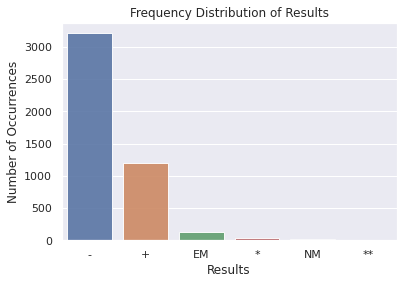

In [21]:
carrier_count = df1 ['RSV'].value_counts()

#definimos el estilo de gráfico
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
#titulo
plt.title('Frequency Distribution of Results')
#Nombres de los ejes
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Results', fontsize=12)

plt.show()

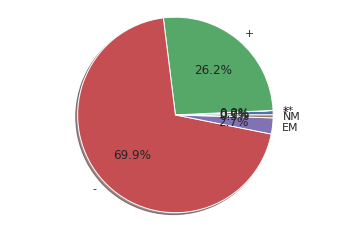

In [22]:
labels = df1 ['RSV'].astype('category').cat.categories.tolist()
counts = df1 ['RSV'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

### ¿Cómo podríamos saber si existe relación entre la infección con más de un virus?

***Tablas de contingencia***

In [23]:
df2 = df1 ['RSV'] + df1 ['AdenoV']

a = df1 ['RSV'] == '+'
b = df1 ['AdenoV'] == '+'

#comparamos los datos en una tabla de contingencia
groups = df2.groupby([a,b]).count() 
print (groups)

RSV    AdenoV
False  False     3365
       True        24
True   False     1204
       True         1
dtype: int64


In [24]:
#Test de comparación de datos cualitativos
ss.chisquare(groups, ddof=0, axis=0)

Power_divergenceResult(statistic=6527.826730518067, pvalue=0.0)

**¿Cómo podría saber si ser positivo para RSV es más probable en chicos que en grandes?**

**Obteniendo previamente los datos del servicio meteorológico nacional:
¿podrían hacer alguna inferencia de la relación entre la temperatura ambiente y/o la radiación con la incidencia y prevalencia de cada virus?**

https://www.smn.gob.ar/descarga-de-datos

**¿Existe una correlación entre la prevalencia de casos positivos respecto de la temperatura promedio por mes?**

**¿Se les ocurre alguna manera de trabajar con estos datos y comparar distribuciones?**

In [25]:
#Separo los datos en dos grupos

df_pos = df1[df1['RSV'] == '+']
df_neg = df1[df1['RSV'] == '-']

In [33]:
ss.ttest_ind(df_pos['Edad(meses)'], df_neg['Edad(meses)'], axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=-8.936357760462757, pvalue=5.798603181591831e-19)

In [27]:
print ('Edades promedio de postivos = ' + str(df_pos['Edad(meses)'].mean()))
print ('Edades promedio de negativos = ' + str(df_neg['Edad(meses)'].mean()))

Edades promedio de postivos = 10.409294605809128
Edades promedio de negativos = 19.711491747119275


In [28]:
import scipy.stats

mean_pos = df_pos['Edad(meses)'].mean()
std_pos = df_pos['Edad(meses)'].std()
count_pos = df_pos['Edad(meses)'].count()
mean_neg = df_neg['Edad(meses)'].mean()
std_neg =  df_neg['Edad(meses)'].std()
count_neg = df_neg['Edad(meses)'].count()

ss.ttest_ind_from_stats(mean_pos, std_pos, count_pos, mean_neg, std_neg, count_neg, equal_var=True)

Ttest_indResult(statistic=-8.936357760462757, pvalue=5.798603181591831e-19)

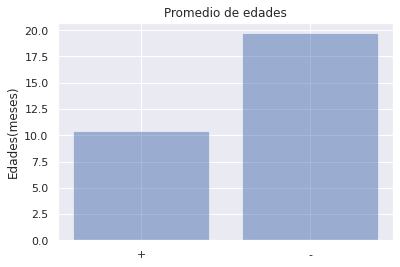

In [29]:
objects = ('+', '-')
y_pos = np.arange(len(objects))
performance = [df_pos['Edad(meses)'].mean(),df_neg['Edad(meses)'].mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Edades(meses)')
plt.title('Promedio de edades')

plt.show()

In [5]:
df = pd.read_csv(path + 'kcat_km.csv', sep=',', header=0, encoding= 'unicode_escape').astype(float)

In [6]:
df = df.dropna()

In [7]:
df

,B-lactamasas,Desplazamientos,BPN,AMP,OXA,TIC,PIP,CFT,CFX,CFP,IMI,MER
1,48.0,1.580347,0.073494,0.060833,0.040476,0.227778,0.257143,0.306122,1.000000,0.400000,0.58,0.5
2,54.0,7.634224,0.024096,0.020833,0.023810,0.034722,0.121429,0.030612,0.166667,0.333333,1.00,1.0
5,181.0,1.313378,0.042892,0.250000,0.041667,0.180556,0.500000,0.051020,0.916667,1.000000,0.40,1.0
6,232.0,1.279839,0.102410,0.366667,0.114286,1.000000,1.000000,0.102041,0.500000,0.666667,0.12,1.0


In [17]:
import scipy.stats

x = df['AMP'][:]
y = df ['OXA'][:]
scipy.stats.pearsonr(x, y)

PearsonRResult(statistic=0.8565947595261068, pvalue=0.14340524047389325)

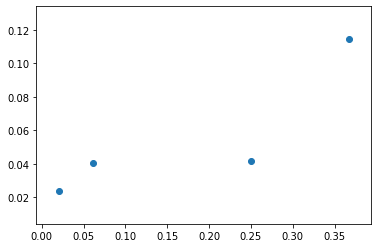

In [18]:
# plot
matplotlib.pyplot.scatter(x,y)

matplotlib.pyplot.show()

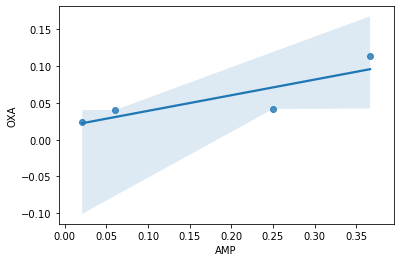

In [19]:
import seaborn as sns

sns.regplot(x=x, y=y)

/home/lean/.local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                    OXA   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     5.512
Date:                Wed, 26 Apr 2023   Prob (F-statistic):              0.143
Time:                        16:39:59   Log-Likelihood:                 10.390
No. Observations:                   4   AIC:                            -16.78
Df Residuals:                       2   BIC:                            -18.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0179      0.020      0.884      0.4

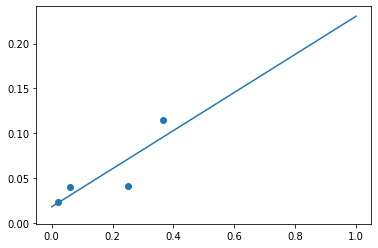

In [20]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

X = x
Y = y

results = sm.OLS(Y,sm.add_constant(X)).fit()

print(results.summary())

plt.scatter(X,Y)

X_plot = np.linspace(0,1,100)
plt.plot(X_plot, X_plot * results.params[1] + results.params[0])

plt.show()